# Exercise 3 - GroupBy Data

In [5]:
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv ('../data/sales_items.csv', encoding = 'latin1')
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933.0,6/27/2010,9925.0,255.28,159.42,2533654.00,1582243.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480.0,9/15/2012,2804.0,205.70,117.11,NaN,328376.44
2,Europe,Russia,Office Supplies,Offline,L,05/02/2014,341417157.0,05/08/2014,1779.0,651.21,524.96,NaN,933903.84
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792.0,07/05/2014,8102.0,9.33,6.92,NaN,56065.84
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02/01/2013,115456712.0,02/06/2013,5062.0,651.21,524.96,NaN,2657347.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119.0,09/03/2011,888.0,109.28,35.84,97040.64,31825.92
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038.0,12/28/2011,6267.0,9.33,6.92,58471.11,43367.64
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,06/01/2016,728815257.0,6/29/2016,1485.0,154.06,90.93,228779.10,135031.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106.0,08/08/2015,5767.0,81.73,56.67,471336.91,326815.89


In [8]:
data.shape

(100, 13)

In [9]:
data.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID          float64
Ship Date          object
Units Sold        float64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
dtype: object

In [10]:
data.isnull().sum()

Region             0
Country            0
Item Type          0
Sales Channel      0
Order Priority     0
Order Date         0
Order ID           7
Ship Date          0
Units Sold        82
Unit Price         0
Unit Cost          0
Total Revenue      5
Total Cost         0
dtype: int64

In [11]:
df = data.dropna()
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933.0,6/27/2010,9925.0,255.28,159.42,2533654.00,1582243.50
88,Middle East and North Africa,Kuwait,Fruits,Online,M,4/30/2012,513417565.0,5/18/2012,522.0,9.33,6.92,4870.26,3612.24
89,Europe,Slovenia,Beverages,Offline,C,10/23/2016,345718562.0,11/25/2016,4660.0,47.45,31.79,221117.00,148141.40
90,Sub-Saharan Africa,Sierra Leone,Office Supplies,Offline,H,12/06/2016,621386563.0,12/14/2016,948.0,651.21,524.96,617347.08,497662.08
91,Australia and Oceania,Australia,Beverages,Offline,H,07/07/2014,240470397.0,07/11/2014,9389.0,47.45,31.79,445508.05,298476.31


# Create a column for Total Profit. display only Region & Total Profit.

In [15]:
df['Total Profit'] = df ['Units Sold'] * df ['Unit Price']
df[['Region', 'Total Profit']].head()

C:\Users\liamr\AppData\Local\Temp\ipykernel_36240\4233375735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Profit'] = df ['Units Sold'] * df ['Unit Price']


,Region,Total Profit
0,Australia and Oceania,2533654.00
88,Middle East and North Africa,4870.26
89,Europe,221117.00
90,Sub-Saharan Africa,617347.08
91,Australia and Oceania,445508.05


    # Create a new dataframe 

In [16]:
regions_data = df[['Country','Region','Total Profit','Total Revenue']]
regions_data.head()

,Country,Region,Total Profit,Total Revenue
0,Tuvalu,Australia and Oceania,2533654.00,2533654.00
88,Kuwait,Middle East and North Africa,4870.26,4870.26
89,Slovenia,Europe,221117.00,221117.00
90,Sierra Leone,Sub-Saharan Africa,617347.08,617347.08
91,Australia,Australia and Oceania,445508.05,445508.05


    # Use groupby in sum all REGIONS in Total Revenue (sort by lowest Total Revenue)

In [19]:
regions_data = regions_data.groupby(['Region']).sum().sort_values('Total Revenue', ascending = True)


    # to display only 2 columns - Total Profit & Total Revenue

In [18]:
regions_data[['Total Profit','Total Revenue']]

,Total Profit,Total Revenue
Region,,
Asia,58471.11,58471.11
Central America and the Caribbean,387002.20,387002.20
North America,471336.91,471336.91
Middle East and North Africa,1320965.67,1320965.67
Australia and Oceania,2979162.05,2979162.05
Europe,3679369.00,3679369.00
Sub-Saharan Africa,4529771.91,4529771.91


In [20]:
regions_data[['Total Profit','Total Revenue']]

,Total Profit,Total Revenue
Region,,
Asia,58471.11,58471.11
Central America and the Caribbean,387002.20,387002.20
North America,471336.91,471336.91
Middle East and North Africa,1320965.67,1320965.67
Australia and Oceania,2979162.05,2979162.05
Europe,3679369.00,3679369.00
Sub-Saharan Africa,4529771.91,4529771.91


In [91]:
#Use groupby in sum all 'Country' in Total Revenue (sort by highest Total Revenue)
#country_data = regions_data.groupby(['Country']).sum().sort_values('Total Revenue', ascending = False)
#country_data

# Plotting the data

<Axes: ylabel='Region'>

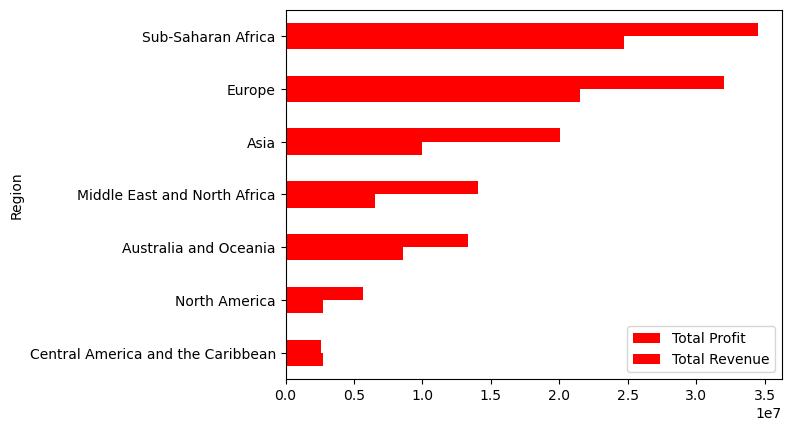

In [93]:
regions_data.plot(kind= 'barh', color = 'red')